In [1]:
import random
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt

# Enhanced patient database with age groups and response history
patients = [
    {"id": 1, "name": "Ravi Kumar", "language": "Tamil", "age_group": "60+", "channel": "IVR", "response_rate": 0.7},
    {"id": 2, "name": "Ananya Rao", "language": "Telugu", "age_group": "30-45", "channel": "WhatsApp", "response_rate": 0.9},
    {"id": 3, "name": "Joseph Mathew", "language": "Malayalam", "age_group": "45-60", "channel": "SMS", "response_rate": 0.6},
    {"id": 4, "name": "Rahul Sharma", "language": "Hindi", "age_group": "30-45", "channel": "WhatsApp", "response_rate": 0.8},
    {"id": 5, "name": "David Thomas", "language": "English", "age_group": "18-30", "channel": "WhatsApp", "response_rate": 0.95},
    {"id": 6, "name": "Geetha Rani", "language": "Tamil", "age_group": "60+", "channel": "IVR", "response_rate": 0.5},
    {"id": 7, "name": "Priya Reddy", "language": "Telugu", "age_group": "30-45", "channel": "SMS", "response_rate": 0.75},
    {"id": 8, "name": "Mohan Das", "language": "Hindi", "age_group": "45-60", "channel": "IVR", "response_rate": 0.65},
    {"id": 9, "name": "Susan George", "language": "English", "age_group": "18-30", "channel": "WhatsApp", "response_rate": 0.92},
    {"id": 10, "name": "Abdul Kareem", "language": "Malayalam", "age_group": "60+", "channel": "IVR", "response_rate": 0.55}
]

In [7]:
# Multi-language message templates for different communication types
messages = {
    "appointment_confirmation": {
        "Tamil": "நோயறிதல்: {appt_type}\nதேதி: {date}\nநேரம்: {time}\nஉங்கள் நேரம் உறுதிசெய்யப்பட்டது. தயவுசெய்து வருக!",
        "Telugu": "అపాయింట్మెంట్ రకం: {appt_type}\nతేదీ: {date}\nసమయం: {time}\nమీ నియామకం నిర్ధారించబడింది. దయచేసి రండి!",
        "Malayalam": "അപ്പോയിന്റ്മെന്റ് തരം: {appt_type}\nതീയതി: {date}\nസമയം: {time}\nനിങ്ങളുടെ അപ്പോയിന്റ്മെന്റ് സ്ഥിരീകരിച്ചിരിക്കുന്നു. ദയവായി വരൂ!",
        "Hindi": "अपॉइंटमेंट प्रकार: {appt_type}\nतारीख: {date}\nसमय: {time}\nआपका अपॉइंटमेंट कन्फर्म हो गया है। कृपया आएं!",
        "English": "Appointment Type: {appt_type}\nDate: {date}\nTime: {time}\nYour appointment is confirmed. Please visit!"
    },
    "wait_time_update": {
        "Tamil": "தற்போதைய காத்திருப்பு நேரம்: {minutes} நிமிடங்கள். தயவு செய்து பொறுமையாக இருங்கள்.",
        "Telugu": "ప్రస్తుత వేటింగ్ టైమ్: {minutes} నిమిషాలు. దయచేసి సహనం వహించండి.",
        "Malayalam": "നിലവിലെ കാത്തിരിപ്പ് സമയം: {minutes} മിനിറ്റ്. ദയവായി ക്ഷമിക്കുക.",
        "Hindi": "वर्तमान प्रतीक्षा समय: {minutes} मिनट। कृपया धैर्य रखें।",
        "English": "Current waiting time: {minutes} minutes. Please be patient."
    },
    "prescription_reminder": {
        "Tamil": "நோயறிதல்: {appt_type}\nஉங்கள் மருந்துகள் தயாராக உள்ளன. அப்பல்லோ கிளினிக்கில் பெற்றுக்கொள்ளவும்.",
        "Telugu": "అపాయింట్మెంట్ రకం: {appt_type}\nమీ మందులు సిద్ధంగా ఉన్నాయి. అపోలో క్లినిక్ వద్ద సేకరించండి.",
        "Malayalam": "അപ്പോയിന്റ്മെന്റ് തരം: {appt_type}\nനിങ്ങളുടെ മരുന്നുകൾ തയ്യാറാണ്. അപ്പോളോ ക്ലിനിക്കിൽ ശേഖരിക്കുക.",
        "Hindi": "अपॉइंटमेंट प्रकार: {appt_type}\nआपकी दवाएं तैयार हैं। अपोलो क्लिनिक से ले लें।",
        "English": "Appointment Type: {appt_type}\nYour medications are ready. Please collect from Apollo Clinic."
    }
}

In [8]:
def select_channel(patient, message_type):
    """Enhanced channel selection with fallback logic"""
    # Default to patient's preferred channel
    channel = patient["channel"]

    # Special cases
    if message_type == "wait_time_update" and patient["age_group"] in ["18-30", "30-45"]:
        channel = "WhatsApp"  # Faster delivery for time-sensitive updates

    # Fallback for low responders
    if patient["response_rate"] < 0.6:
        if channel == "SMS":
            channel = "WhatsApp"
        elif channel == "WhatsApp":
            channel = "IVR"

    return channel

def generate_message(patient, message_type, **kwargs):
    """Generate personalized message with proper formatting"""
    template = messages[message_type][patient["language"]]

    # Special formatting for elderly patients
    if patient["age_group"] == "60+":
        if "time" in kwargs:
            if patient["language"] == "Tamil":
                kwargs["time"] = kwargs["time"].replace("AM", "காலை").replace("PM", "மாலை")
            elif patient["language"] == "Hindi":
                kwargs["time"] = kwargs["time"].replace("AM", "सुबह").replace("PM", "शाम")

    return template.format(**kwargs)

def send_message(patient, message_type, **kwargs):
    """Enhanced message sending with tracking"""
    channel = select_channel(patient, message_type)
    message = generate_message(patient, message_type, **kwargs)

    # Simulate actual sending with 90% success rate
    send_success = random.random() < 0.9

    if send_success:
        print(f"📩 [{channel}] to {patient['name']} ({patient['language']}, {patient['age_group']}):")
        print(f"   {message}\n")
        return True
    else:
        print(f"❌ Failed to send to {patient['name']} via {channel}")
        return False

In [9]:
def simulate_clinic_operations(days=7):
    """Run a multi-day simulation of clinic communications"""
    results = []

    for day in range(days):
        current_date = datetime.now() + timedelta(days=day)
        print(f"\n=== Day {day+1} ({current_date.strftime('%Y-%m-%d')}) ===")

        # Shuffle patients to randomize selection
        random.shuffle(patients)

        # Select patients for appointments (30% of patients each day)
        for patient in patients[:int(len(patients)*0.3)]:
            # Appointment confirmation (24 hours before)
            appt_type = random.choice(appointment_types)
            appt_time = random.choice(["9:00 AM", "11:30 AM", "2:00 PM", "4:30 PM"])

            send_success = send_message(
                patient,
                "appointment_confirmation",
                appt_type=appt_type,
                date=current_date.strftime('%d/%m/%Y'),
                time=appt_time
            )

            if send_success:
                # Simulate patient response
                responded = random.random() < patient["response_rate"]

                # Wait time update on appointment day (for those who confirmed)
                if responded:
                    wait_time = random.randint(10, 90)
                    send_message(
                        patient,
                        "wait_time_update",
                        minutes=wait_time
                    )

                results.append({
                    "patient_id": patient["id"],
                    "day": day+1,
                    "message_type": "appointment_confirmation",
                    "channel": patient["channel"],
                    "language": patient["language"],
                    "age_group": patient["age_group"],
                    "responded": responded
                })

    return pd.DataFrame(results)

In [10]:
def analyze_results(results):
    """Analyze and visualize the simulation results"""
    if len(results) == 0:
        print("No results to analyze")
        return

    # Convert to DataFrame if not already
    if not isinstance(results, pd.DataFrame):
        results = pd.DataFrame(results)

    # Calculate overall response rate
    overall_rate = results['responded'].mean()
    print(f"\nOverall Response Rate: {overall_rate:.1%}")

    # Response rate by language
    lang_response = results.groupby('language')['responded'].mean().sort_values()

    # Response rate by channel
    channel_response = results.groupby('channel')['responded'].mean().sort_values()

    # Response rate by age group
    age_response = results.groupby('age_group')['responded'].mean().sort_values()

    # Plotting
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    lang_response.plot(kind='barh', color='skyblue')
    plt.title('Response Rate by Language')
    plt.xlabel('Response Rate')

    plt.subplot(1, 3, 2)
    channel_response.plot(kind='barh', color='lightgreen')
    plt.title('Response Rate by Channel')
    plt.xlabel('Response Rate')

    plt.subplot(1, 3, 3)
    age_response.plot(kind='barh', color='salmon')
    plt.title('Response Rate by Age Group')
    plt.xlabel('Response Rate')

    plt.tight_layout()
    plt.show()

    return {
        'language_analysis': lang_response,
        'channel_analysis': channel_response,
        'age_analysis': age_response
    }

=== Apollo Clinic Communication System Simulation ===
Simulating for 10 patients...


=== Day 1 (2025-03-27) ===
📩 [WhatsApp] to David Thomas (English, 18-30):
   Appointment Type: Cardiology
Date: 27/03/2025
Time: 11:30 AM
Your appointment is confirmed. Please visit!

📩 [WhatsApp] to David Thomas (English, 18-30):
   Current waiting time: 42 minutes. Please be patient.

📩 [IVR] to Ravi Kumar (Tamil, 60+):
   நோயறிதல்: General Checkup
தேதி: 27/03/2025
நேரம்: 9:00 காலை
உங்கள் நேரம் உறுதிசெய்யப்பட்டது. தயவுசெய்து வருக!

📩 [IVR] to Ravi Kumar (Tamil, 60+):
   தற்போதைய காத்திருப்பு நேரம்: 82 நிமிடங்கள். தயவு செய்து பொறுமையாக இருங்கள்.

📩 [SMS] to Priya Reddy (Telugu, 30-45):
   అపాయింట్మెంట్ రకం: Dermatology
తేదీ: 27/03/2025
సమయం: 9:00 AM
మీ నియామకం నిర్ధారించబడింది. దయచేసి రండి!

📩 [WhatsApp] to Priya Reddy (Telugu, 30-45):
   ప్రస్తుత వేటింగ్ టైమ్: 60 నిమిషాలు. దయచేసి సహనం వహించండి.


=== Day 2 (2025-03-28) ===
📩 [IVR] to Mohan Das (Hindi, 45-60):
   अपॉइंटमेंट प्रकार: ENT
तारीख: 28/03/2

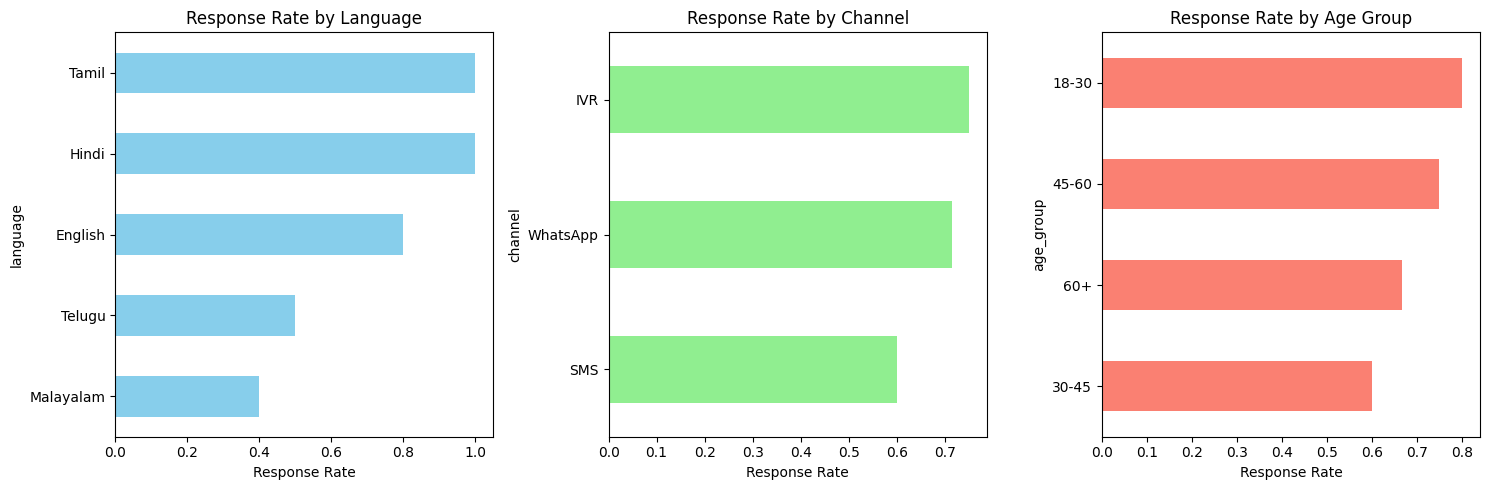


Key Findings:
- Best responding language: Hindi (100.0%)
- Most effective channel: IVR (75.0%)
- Best responding age group: 18-30 (80.0%)


In [11]:
if __name__ == "__main__":
    print("=== Apollo Clinic Communication System Simulation ===")
    print(f"Simulating for {len(patients)} patients...\n")

    # Run 7-day simulation
    results = simulate_clinic_operations(days=7)

    # Analyze results
    if len(results) > 0:
        analysis = analyze_results(results)

        print("\nKey Findings:")
        print(f"- Best responding language: {analysis['language_analysis'].idxmax()} ({analysis['language_analysis'].max():.1%})")
        print(f"- Most effective channel: {analysis['channel_analysis'].idxmax()} ({analysis['channel_analysis'].max():.1%})")
        print(f"- Best responding age group: {analysis['age_analysis'].idxmax()} ({analysis['age_analysis'].max():.1%})")
    else:
        print("No messages were sent during the simulation period")